In [158]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import math
%pylab inline
import matplotlib.pylab as plt
from nltk.stem import WordNetLemmatizer

Populating the interactive namespace from numpy and matplotlib


C:\Users\phatp\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [117]:
data = pd.read_csv("Valid_rev1.csv")

In [118]:
data1 = data.sample(2500)
#data1

Id                                              Title  \
4621   67946597          Java Technical Consultant GBP****k  Leeds   
9779   68688423  Estate Agent Senior Valuer / Lister  Estate Ag...   
31680  71746835  Graduate Sales Executive Retail Finance digita...   
7919   68585772                                   Despatch Manager   
40238  72684500                                  Mixed Tax Manager   
5592   68193398                                   Project Engineer   
6451   68346850  SQL Data Warehouse Developer  SQL **** / **** ...   
6381   68309887  Cardiothoracic Surgical / HDU Staff Nurse  London   
16198  69265299   Embedded Linux Kernel Developer  Guildford  ****   
26417  71171599                             Agency Sales Executive   
34013  72115977  Senior Design EngineerManufacturingCoventry **...   
24671  70761348                  Pemanent English teacher required   
37829  72445241            Graduate Engineer (Mechanical Engineer)   
31764  71749837        Primary teachers required in Shepton Mallet   
8649   68666471                     New Business Account Executive   
11262  68718766                                        STAFF NURSE   
30595  71658210        Expatriate Tax Manager  Big 4 firm  Reading   
28410  71376496                Senior Software Engineer (Telecoms)   
12826  69009251                              Sales Project Manager   
21942  70209842                                      Brand Manager   
12227  68994184                                    Finance Manager   
11071  68713003                                         Accountant   
30288  71614826       Nurse Team Leader ( RGN / RMN )  Camden Town   
22969  70441992                           Principal Ecologist ****   
31484  71717150                 Graduate Sales Account  Manchester   
35804  72242347    Graduate Account Executive  Huge Digital Agency   
21409  70101193          Senior Project Manager, Bucks, Mechanical   
20129  69931696        Sales Manager, East London, Motor Trade Job   
28196  71360767                           Customer Support Manager   
19095  69760706                                 Sales Office Clerk   
...         ...                                                ...   
8245   68628152                                  Support Team Lead   
24276  70732616  Junior Web Developer  URGENT  C, ASPNet, JavaS...   
9581   68685498                           Account Managers B2B x 2   
40461  72691162                         Visitor Experience Manager   
5556   68183768          Newly qualified teachers urgenty required   
32042  71763873                             Database Administrator   
9043   68677124                                          Toolmaker   
30752  71675136                                Performance Analyst   
20933  69994509                             Maintenance Supervisor   
31168  71685288                        Senior Digital Web Designer   
27845  71320590    Room Attendant required for North London Hotels   
35806  72242400                              Wonderware Consultant   
19704  69822969                   PA to Founding Partner  West End   
16680  69539322                                       RMN Bradford   
351    54486566                                    Service Manager   
29990  71593310                Software Engineer (Graduate/Junior)   
22921  70437317                               Installation Manager   
24352  70739430                                   Primary Teachers   
2791   66920382                                              Buyer   
21606  70163464  Teacher of Maths (**** FTE) long term temporar...   
8977   68676055                  Training & Development Consultant   
3166   67101313                                 Project Accountant   
9892   68690151                Systems Engineer (Defence Industry)   
21711  70170344             Operations Manager  (Bioenergy Plants)   
5859   68238288                                      LGV CE Driver   
17960  69600483        

In [121]:
def process_text(t):
    t = t.lower()
    for a in punctuation:
        t = t.replace(a,'')
    return t



In [ ]:
text = data1['FullDescription'].map(process_text)

In [123]:
text_with_stop = []
def pos_filter(a):
    #tf = unicode(a, 'utf-8')
    tf = word_tokenize(a)
    pos_text = nltk.pos_tag(tf)
    text_with_stop.append(pos_text)

text.map(pos_filter)
text_with_stop = sum(text_with_stop, [])




In [124]:
tag_fd = nltk.FreqDist([t for (w, t) in text_with_stop])
#tag_fd.most_common(tag_fd)
tag_fd.most_common(5)

[('NN', 157452), ('JJ', 69701), ('IN', 65299), ('DT', 50888), ('NNS', 50591)]

In [125]:
stop = set(stopwords.words('english'))

In [197]:
text2 = data1['FullDescription'].map(process_text)
text_stop = []
def pos_filter(a):
    tf = unicode(a, 'utf-8')
    tf = word_tokenize(tf)
    tf = [t for t in tf if t not in stop]
    pos_text = nltk.pos_tag(tf)
    text_stop.append(pos_text)

text2.map(pos_filter)

#text_stop = sum(text_stop, [])
text_stop



[[(u'oracle', 'NN'),
  (u'graduate', 'NN'),
  (u'development', 'NN'),
  (u'scheme', 'NN'),
  (u'java', 'NN'),
  (u'technical', 'JJ'),
  (u'consultant', 'NN'),
  (u'nationwide', 'JJ'),
  (u'pound', 'NN'),
  (u'basic', 'JJ'),
  (u'performance', 'NN'),
  (u'related', 'VBN'),
  (u'bonus', 'IN'),
  (u'ref', 'NN'),
  (u'ddll', 'NN'),
  (u'future', 'JJ'),
  (u'part', 'NN'),
  (u'oracle', 'NN'),
  (u'corporation', 'NN'),
  (u'american', 'JJ'),
  (u'multinational', 'JJ'),
  (u'computer', 'NN'),
  (u'technology', 'NN'),
  (u'corporation', 'NN'),
  (u'specialises', 'VBZ'),
  (u'developing', 'VBG'),
  (u'marketing', 'VBG'),
  (u'hardware', 'NN'),
  (u'systems', 'NNS'),
  (u'enterprise', 'VBP'),
  (u'software', 'NN'),
  (u'products', 'NNS'),
  (u'particularly', 'RB'),
  (u'database', 'JJ'),
  (u'management', 'NN'),
  (u'systems', 'NNS'),
  (u'currently', 'RB'),
  (u'increasing', 'VBG'),
  (u'size', 'NN'),
  (u'team', 'NN'),
  (u'fantastic', 'JJ'),
  (u'new', 'JJ'),
  (u'opportunity', 'NN'),
  (u'dr

In [201]:
text_stop = [item for sublist in text_stop for item in sublist]

In [202]:
tag_fd = nltk.FreqDist([t for (w, t) in text_stop])
#tag_fd.most_common(tag_fd)
tag_fd.most_common(5)

[('NN', 152842), ('JJ', 71906), ('NNS', 49956), ('VBG', 25414), ('VBP', 16945)]

## Part A2

In [221]:
tag_fd = nltk.FreqDist([w for (w, t) in text_with_stop])
#tag_fd.most_common(tag_fd)
tag_list = tag_fd.most_common(100)

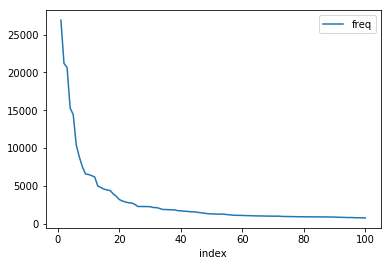

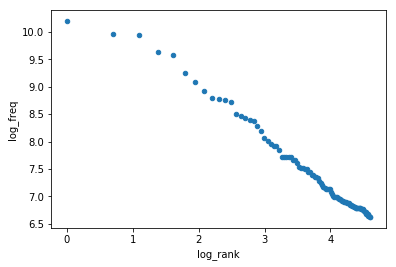

In [156]:
df = pd.DataFrame(tag_list, columns=['word', 'freq'])
df.index = df.index + 1
df = df.reset_index()
df['log_freq'] = df['freq'].map(lambda a: math.log(a))
df['log_rank'] = df['index'].map(lambda a: math.log(a))
df.plot(x = 'index', y='freq')
df.plot(kind='scatter',x='log_rank',y='log_freq')
#run ols and find what theta is (hopefully around -1)
# n is smallest or largest

In [225]:
df['norm_log_freq'] = (df['freq'] / (100*min(df['freq']))).map(math.log)


In [226]:

from  statsmodels.formula.api  import ols

formula = 'log_rank ~ 0 + norm_log_freq'
results = ols(formula, df).fit()
hypotheses = 'norm_log_freq = -1'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.9767      0.004      6.494      0.000      -0.984      -0.970


## Part A3

In [174]:
lemmatizer = WordNetLemmatizer()
ex= text2.iloc[4]
tf = word_tokenize(ex)
print tf
print
#print(lemmatizer.lemmatize(text2.iloc[4],'v'))
lmtzr = WordNetLemmatizer()

tokens = [lmtzr.lemmatize(word,'v') for word in tf]
preprocessed_text= ' '.join(tokens)
preprocessed_text

['mixed', 'tax', 'manager', 'cheltenham', '50000', 'my', 'client', 'a', 'chartered', 'accountancy', 'practice', 'in', 'cheltenham', 'requires', 'a', 'mixed', 'tax', 'manager', 'to', 'join', 'their', 'established', 'tax', 'team', 'you', 'will', 'report', 'directly', 'the', 'tax', 'partners', 'and', 'will', 'be', 'responsible', 'for', 'a', 'varied', 'work', 'load', 'this', 'is', 'a', 'fantastic', 'opportunity', 'to', 'work', 'for', 'a', 'market', 'leader', 'in', 'the', 'gloucestershire', 'area', 'if', 'you', 'have', 'experience', 'of', 'working', 'with', 'legal', 'clients', 'this', 'is', 'a', 'bonus', 'but', 'not', 'a', 'prerequisite', 'for', 'more', 'information', 'please', 'contact', 'nic', 'cowley', 'on']



u'mix tax manager cheltenham 50000 my client a charter accountancy practice in cheltenham require a mix tax manager to join their establish tax team you will report directly the tax partner and will be responsible for a vary work load this be a fantastic opportunity to work for a market leader in the gloucestershire area if you have experience of work with legal clients this be a bonus but not a prerequisite for more information please contact nic cowley on'

In [203]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
    
def lemmatize_sentence(sentence):
    #nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #sentence = unicode(sentence, 'utf-8')
    nltk_tagged = sentence
    #print nltk_tagged
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    #print wn_tagged
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:            
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
            #print res_words
    return " ".join(res_words)

a = lemmatize_sentence(text_stop)


In [205]:
tag_fd = nltk.FreqDist(word_tokenize(a))
#tag_fd.most_common(tag_fd)
tag_list = tag_fd.most_common(10)
tag_list

[(u'work', 5236),
 (u'experience', 4885),
 (u'role', 3148),
 (u'team', 3063),
 (u'client', 2940),
 (u'business', 2649),
 (u'service', 2407),
 (u'skill', 2205),
 (u'manager', 2163),
 (u'within', 2112)]